# Overview
**Sumber**

Hendratno, “COVID-19 Indonesia Dataset.” Kaggle, doi: 10.34740/KAGGLE/DSV/1314265. (https://www.kaggle.com/hendratno/covid19-indonesia)

**Context**

The COVID-19 dataset in Indonesia was created to find out various factors that could be taken into consideration in decision making related to the level of stringency in each province in Indonesia.

**Content**

Data compiled based on time series, both on a country level (Indonesia), and on a province level. If needed in certain provinces, it might also be provided at the city / regency level. Demographic data is also available, as well as calculations between demographic data and COVID-19 pandemic data.

**Acknowledgements**

Thank you to those who have provided data openly so that we can compile it into a dataset here, which is as follows: covid19.go.id, kemendagri.go.id, bps.go.id, and bnpb-inacovid19.hub.arcgis.com

**About this file**
The COVID-19 pandemic dataset in Indonesia, time series. This dataset is a compilation of various open data sources, including: covid19.go.id (pandemic data), kemendagri.go.id (demographic data), bps.go.id (demographic data), as well as some calculations of the relationship of the data.

This dataset contains a time series of COVID-19 pandemic events in Indonesia, at the country level to province level. If possible, in the future I will provide it to the city/regency level.

# Import Standard Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Persiapan Data

In [2]:
df = pd.read_csv('data/covid19-timeseries.csv',parse_dates=['Date'])

In [3]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,3,0,0,3,501,20,39,...,106.836118,-6.204699,0.28,46.19,0.0,1.84,3.99%,7.78%,NaN,NaN
1,2020-03-01,ID-JB,Jawa Barat,3,0,0,3,3,5,4,...,107.603708,-6.920432,0.07,0.07,0.0,0.11,166.67%,133.33%,NaN,NaN
2,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,503,20,39,...,106.836118,-6.204699,0.18,46.38,0.0,1.84,3.98%,7.75%,0.67,1.0
3,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
4,2020-03-02,ID-JB,Jawa Barat,0,0,0,0,3,5,4,...,107.603708,-6.920432,0.00,0.07,0.0,0.11,166.67%,133.33%,0.00,1.0


In [4]:
df.head().T

,0,1,2,3,4
Date,2020-03-01 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00
Location ISO Code,ID-JK,ID-JB,ID-JK,IDN,ID-JB
Location,DKI Jakarta,Jawa Barat,DKI Jakarta,Indonesia,Jawa Barat
New Cases,3,3,2,2,0
New Deaths,0,0,0,0,0
New Recovered,0,0,0,0,0
New Active Cases,3,3,2,2,0
Total Cases,501,3,503,2,3
Total Deaths,20,5,20,0,5
Total Recovered,39,4,39,0,4


In [5]:
df['Location'].unique(),len(df['Location'].unique())

(array(['DKI Jakarta', 'Jawa Barat', 'Indonesia', 'Banten',
        'Sulawesi Tenggara', 'Kalimantan Timur',
        'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Tengah',
        'Jawa Timur', 'Sulawesi Selatan', 'Maluku', 'Papua',
        'Maluku Utara', 'Aceh', 'Kalimantan Tengah', 'Lampung',
        'Sulawesi Tengah', 'Sumatera Barat', 'Papua Barat',
        'Kalimantan Utara', 'Sulawesi Barat', 'Sumatera Selatan', 'Bali',
        'Kalimantan Barat', 'Riau', 'Jambi', 'Kalimantan Selatan',
        'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Bengkulu',
        'Nusa Tenggara Barat', 'Sulawesi Utara', 'Nusa Tenggara Timur',
        'Gorontalo'], dtype=object),
 35)

# Pembersihan & Pemilihan Data

In [6]:
# parameter = ['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Case Fatality Rate','Case Recovered Rate']
parameter = ['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases']

In [7]:
dataframe = pd.DataFrame(columns=parameter)

In [8]:
dataframe.head()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases


In [9]:
for param in parameter:
    dataframe[param] = df[param][df.Location == 'Indonesia']

In [10]:
dataframe.reset_index(inplace=True,drop=True)

In [11]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases
123,2020-07-03,60695,3036,27568,30091
124,2020-07-04,62142,3089,28219,30834
125,2020-07-05,63749,3171,29105,31473
126,2020-07-06,64958,3241,29919,31798
127,2020-07-07,66226,3309,30785,32132


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                128 non-null    datetime64[ns]
 1   Total Cases         128 non-null    int64         
 2   Total Deaths        128 non-null    int64         
 3   Total Recovered     128 non-null    int64         
 4   Total Active Cases  128 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 5.1 KB


# Konversi Data ke Numerical

In [13]:
# percent_data = ['Case Fatality Rate','Case Recovered Rate']

In [14]:
# for col in percent_data:
#     temp = []
#     for row in range(len(dataframe[col])):
#         temp.append(float(dataframe[col][row][:-1]))
#     dataframe.drop([col],axis=1,inplace=True)
#     dataframe[col] = temp

In [15]:
dataframe['Day'] = dataframe.Date.dt.day
dataframe['Month'] = dataframe.Date.dt.month
dataframe['Year'] = dataframe.Date.dt.year
dataframe['DayOfWeek'] = dataframe.Date.dt.dayofweek
dataframe['DayOfYear'] = dataframe.Date.dt.dayofyear

In [16]:
dataframe.tail()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Day,Month,Year,DayOfWeek,DayOfYear
123,2020-07-03,60695,3036,27568,30091,3,7,2020,4,185
124,2020-07-04,62142,3089,28219,30834,4,7,2020,5,186
125,2020-07-05,63749,3171,29105,31473,5,7,2020,6,187
126,2020-07-06,64958,3241,29919,31798,6,7,2020,0,188
127,2020-07-07,66226,3309,30785,32132,7,7,2020,1,189


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                128 non-null    datetime64[ns]
 1   Total Cases         128 non-null    int64         
 2   Total Deaths        128 non-null    int64         
 3   Total Recovered     128 non-null    int64         
 4   Total Active Cases  128 non-null    int64         
 5   Day                 128 non-null    int64         
 6   Month               128 non-null    int64         
 7   Year                128 non-null    int64         
 8   DayOfWeek           128 non-null    int64         
 9   DayOfYear           128 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 10.1 KB


# Visualisasi Data

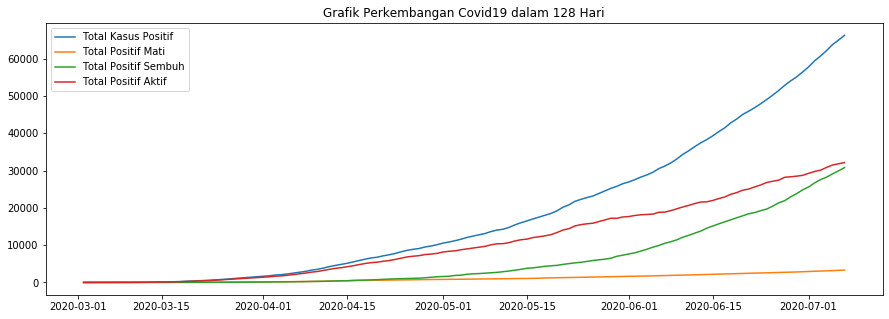

In [18]:
plt.figure(figsize=(15,5))
plt.title('Grafik Perkembangan Covid19 dalam 128 Hari')
plt.plot(dataframe['Date'],dataframe['Total Cases'],label='Total Kasus Positif')
plt.plot(dataframe['Date'],dataframe['Total Deaths'],label='Total Positif Mati')
plt.plot(dataframe['Date'],dataframe['Total Recovered'],label='Total Positif Sembuh')
plt.plot(dataframe['Date'],dataframe['Total Active Cases'],label='Total Positif Aktif')
plt.legend()

In [19]:
# plt.figure(figsize=(15,5))
# plt.title('Presentasee Perkembangan Covid19 dalam 128 Hari')
# plt.plot(dataframe['Date'],dataframe['Case Fatality Rate'],'r',label='Presentase Kematian')
# plt.plot(dataframe['Date'],dataframe['Case Recovered Rate'],'g',label='Presentase Kesembuhan')
# plt.legend()

# Split Data

In [20]:
case_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
case_y = dataframe['Total Cases']

In [21]:
death_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
death_y = dataframe['Total Deaths']

In [22]:
recovered_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
recovered_y = dataframe['Total Recovered']

In [23]:
active_x = dataframe.drop(['Date','Total Cases','Total Deaths','Total Recovered','Total Active Cases'],axis=1)
active_y = dataframe['Total Active Cases']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
case_x_train,case_x_test,case_y_train,case_y_test = train_test_split(case_x,case_y,test_size=0.2)

In [26]:
death_x_train,death_x_test,death_y_train,death_y_test = train_test_split(death_x,death_y,test_size=0.2)

In [27]:
recovered_x_train,recovered_x_test,recovered_y_train,recovered_y_test = train_test_split(recovered_x,recovered_y,test_size=0.2)

In [28]:
active_x_train,active_x_test,active_y_train,active_y_test = train_test_split(active_x,active_y,test_size=0.2)

# Machine Learning Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
semua_data = [
    (case_x_train,case_x_test,case_y_train,case_y_test,'Total Kasus'),
    (death_x_train,death_x_test,death_y_train,death_y_test,'Total Kematian'),
    (recovered_x_train,recovered_x_test,recovered_y_train,recovered_y_test,'Total Sembuh'),
    (active_x_train,active_x_test,active_y_train,active_y_test,'Total Aktif')
]

In [31]:
model = RandomForestRegressor(n_estimators=10)

In [32]:
model.fit(case_x_train,case_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
prediction = model.predict(case_x_test)

In [34]:
def visualisasiPrediksi(y_true,y_pred):
    figure,axes = plt.subplots(ncols=1,nrows=2,figsize=(15,6))
    axes[0].set_title('Prediksi vs Aktual')
    axes[0].plot([i for i in range(len(y_true))],y_true,'r',label='Aktual')
    axes[0].plot([i for i in range(len(y_pred))],y_pred,'b',label='Prediksi')
    axes[0].legend()
    
    selisih = abs(y_true-y_pred)
    axes[1].set_title('Selisih')
    axes[1].plot([i for i in range(len(selisih))],selisih,label='Nilai Selisih')
    axes[1].plot([i for i in range(len(selisih))],[np.mean(selisih) for i in range(len(selisih))],'--',label='Mean')
    axes[1].plot([i for i in range(len(selisih))],[np.median(selisih) for i in range(len(selisih))],'--',label='Median')
    axes[1].legend()
    plt.show()

**Prediksi vs Aktual**

Semakin dekat (hingga menumpuk) 2 grafik, maka semakin tepat prediksi model

**Selisih**

Semakin datar grafik (hingga tepat horizontal) maka semakin tepat prediksi model

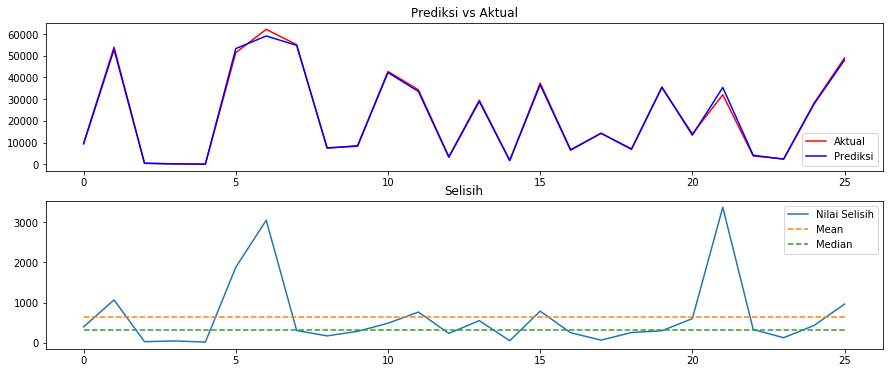

In [35]:
visualisasiPrediksi(case_y_test,prediction)

# Matrix Evaluation

* **MAE** (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* **MSE** (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* **MSLE** (Mean Squared Logarithmic Error) can be interpreted as a measure of the ratio between the true and predicted values.
* **R-squared** (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [37]:
def evaluasiPrediksi(y_true,y_pred):
    print(f'MAE (Mean Absolute Error) : {mean_absolute_error(y_true,y_pred)}')
    print(f'MSE (Mean Squared Error) : {mean_squared_error(y_true,y_pred)}')
    print(f'MSLE (Mean Squared Absolute Error) : {mean_squared_log_error(y_true,y_pred)}')
    print(f'r2 (R-Squared) : {r2_score(y_true,y_pred)}')

In [38]:
evaluasiPrediksi(case_y_test,prediction)

MAE (Mean Absolute Error) : 645.3423076923082
MSE (Mean Squared Error) : 1123369.5488461535
MSLE (Mean Squared Absolute Error) : 0.005288166643273641
r2 (R-Squared) : 0.9972187405572561


# Prediksi Semua Data

Sekarang Memprediksi : Total Kasus
MAE (Mean Absolute Error) : 384.4923076923077
MSE (Mean Squared Error) : 297846.8492307695
MSLE (Mean Squared Absolute Error) : 0.006425847850156973
r2 (R-Squared) : 0.9992625851726482


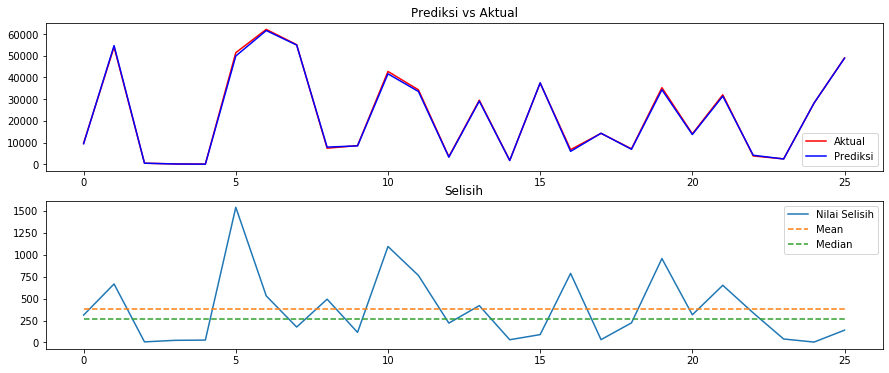

Sekarang Memprediksi : Total Kematian
MAE (Mean Absolute Error) : 13.515384615384631
MSE (Mean Squared Error) : 450.19307692307746
MSLE (Mean Squared Absolute Error) : 0.005977468759000172
r2 (R-Squared) : 0.9994920815264753


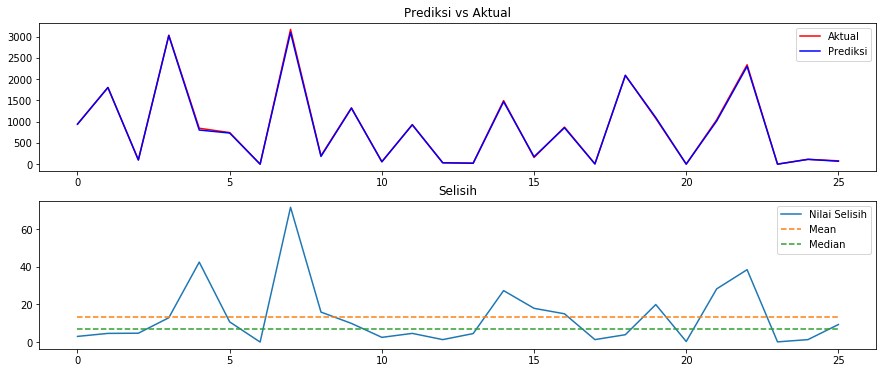

Sekarang Memprediksi : Total Sembuh
MAE (Mean Absolute Error) : 318.9076923076924
MSE (Mean Squared Error) : 232243.04769230785
MSLE (Mean Squared Absolute Error) : 0.007818449878824582
r2 (R-Squared) : 0.9963728456706114


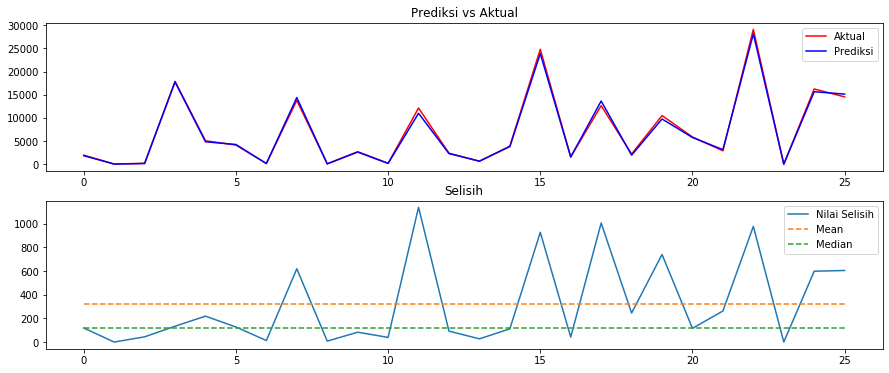

Sekarang Memprediksi : Total Aktif
MAE (Mean Absolute Error) : 233.4730769230769
MSE (Mean Squared Error) : 133813.7357692307
MSLE (Mean Squared Absolute Error) : 0.013702305852284899
r2 (R-Squared) : 0.9984475013396178


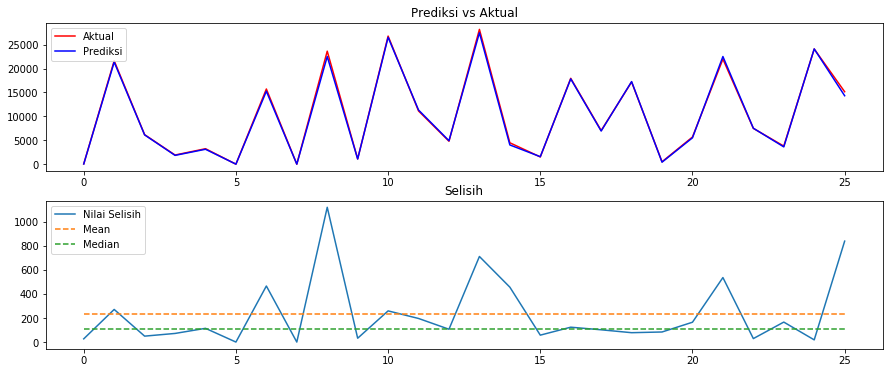

In [39]:
all_models = []
for data in semua_data:
    print(f'Sekarang Memprediksi : {data[4]}')
    model = RandomForestRegressor(n_estimators=10)
    model.fit(data[0],data[2])
    prediction = model.predict(data[1])
    evaluasiPrediksi(data[3],prediction)
    visualisasiPrediksi(data[3],prediction)
    all_models.append((data[4],model))

# Save Models

In [40]:
all_models

[('Total Kasus',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('Total Kematian',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('To

In [41]:
import pickle

In [42]:
for mod in all_models:
    with open(f'models/covid19/{mod[0]}.pkl','wb') as file:
        pickle.dump(mod[1],file)
        print(f'Saved Model : {mod[0]}')

Saved Model : Total Kasus
Saved Model : Total Kematian
Saved Model : Total Sembuh
Saved Model : Total Aktif


# Prediksi

In [43]:
case_x_test

,Day,Month,Year,DayOfWeek,DayOfYear
58,29,4,2020,2,120
118,28,6,2020,6,180
20,22,3,2020,6,82
15,17,3,2020,1,77
12,14,3,2020,5,74
116,26,6,2020,4,178
124,4,7,2020,5,186
119,29,6,2020,0,181
51,22,4,2020,2,113
54,25,4,2020,5,116


In [44]:
tanggal = pd.date_range(start='2020-07-08',end='2020-08-08')

In [45]:
tanggal

DatetimeIndex(['2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
               '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08'],
              dtype='datetime64[ns]', freq='D')

In [46]:
tanggal.dtype

dtype('<M8[ns]')

In [47]:
tanggal_depan = pd.DataFrame(tanggal,columns=['Date'])

In [48]:
tanggal_depan['Day'] = tanggal_depan.Date.dt.day
tanggal_depan['Month'] = tanggal_depan.Date.dt.month
tanggal_depan['Year'] = tanggal_depan.Date.dt.year
tanggal_depan['DayOfWeek'] = tanggal_depan.Date.dt.dayofweek
tanggal_depan['DayOfYear'] = tanggal_depan.Date.dt.dayofyear
tanggal_depan.drop('Date',axis=1,inplace=True)

In [49]:
tanggal_depan

,Day,Month,Year,DayOfWeek,DayOfYear
0,8,7,2020,2,190
1,9,7,2020,3,191
2,10,7,2020,4,192
3,11,7,2020,5,193
4,12,7,2020,6,194
5,13,7,2020,0,195
6,14,7,2020,1,196
7,15,7,2020,2,197
8,16,7,2020,3,198
9,17,7,2020,4,199


In [50]:
model.predict(tanggal_depan)

array([31966.8, 31837. , 31608.8, 31608.8, 31608.8, 31933.4, 31225.3,
       30573.1, 30844.1, 30615.9, 30615.9, 30615.9, 30539.7, 30573.1,
       30573.1, 31084.2, 30856. , 30856. , 30976.2, 30860.1, 30893.5,
       30893.5, 31113.5, 30885.3, 31068.5, 31068.5, 31405.8, 31513.5,
       31770.2, 31803.6, 31608.8, 31608.8])

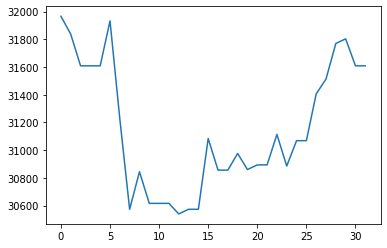

In [51]:
plt.plot(range(len(tanggal_depan)),model.predict(tanggal_depan))